In [1]:
from Adversary import Problem, Adversary
import numpy as np
import scipy
from Examples import threshold_k
from Solvers import adv_solver, space_adv_solver
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] =150

In [4]:
n = 5
k = 2
prob = threshold_k(n, k)
print(prob)
adv = space_adv_solver(prob,5)

No:[(0, 0, 0, 0, 1), (0, 0, 0, 1, 0), (0, 0, 1, 0, 0), (0, 1, 0, 0, 0), (1, 0, 0, 0, 0)]
Yes:[(0, 0, 0, 1, 1), (0, 0, 1, 0, 1), (0, 0, 1, 1, 0), (0, 1, 0, 0, 1), (0, 1, 0, 1, 0), (0, 1, 1, 0, 0), (1, 0, 0, 0, 1), (1, 0, 0, 1, 0), (1, 0, 1, 0, 0), (1, 1, 0, 0, 0)]
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 13 03:15:54 PM: Your problem has 241 variables, 8 constraints, and 0 parameters.
(CVXPY) Jul 13 03:15:54 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 13 03:15:54 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 13 03:15:54 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation              

2.4100768835530024
[1.808932025441083, 1.808932025440871, 1.808932025437777, 1.8089320254371757, 1.8089320254441177]


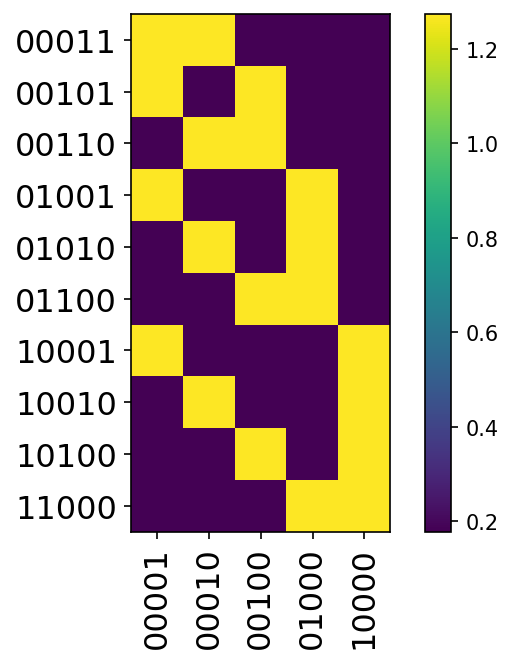

[[1.27381684 1.27381684 0.17837173 0.17837173 0.17837173]
 [1.27381684 0.17837173 1.27381684 0.17837173 0.17837173]
 [0.17837173 1.27381684 1.27381684 0.17837173 0.17837173]
 [1.27381684 0.17837173 0.17837173 1.27381684 0.17837173]
 [0.17837173 1.27381684 0.17837173 1.27381684 0.17837173]
 [0.17837173 0.17837173 1.27381684 1.27381684 0.17837173]
 [1.27381684 0.17837173 0.17837173 0.17837173 1.27381684]
 [0.17837173 1.27381684 0.17837173 0.17837173 1.27381684]
 [0.17837173 0.17837173 1.27381684 0.17837173 1.27381684]
 [0.17837173 0.17837173 0.17837173 1.27381684 1.27381684]]


In [3]:
print(adv.norm()/adv.partial_norm(0))
print(list(adv.partial_norm(i) for i in range(n)))
adv.visualize_matrix()
print(adv.matrix)

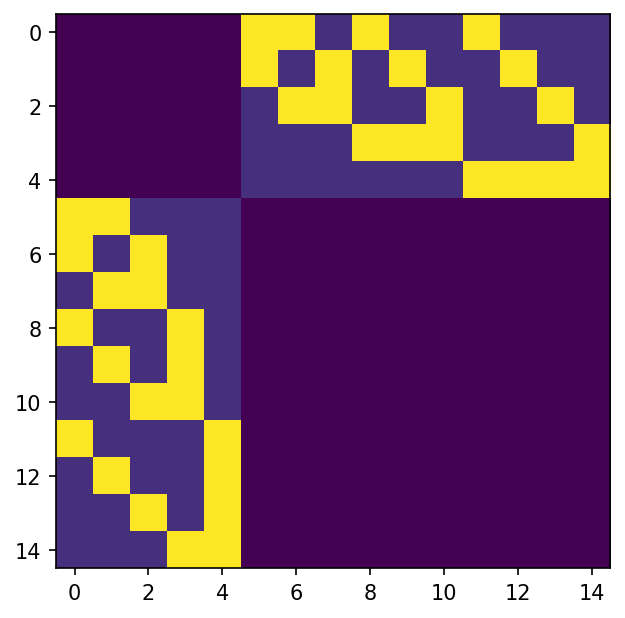

[-4.35966526e+00+0.00000000e+00j  4.35966526e+00+0.00000000e+00j
  1.89736660e+00+0.00000000e+00j  1.89736660e+00+0.00000000e+00j
  1.89736660e+00+0.00000000e+00j  1.89736660e+00+0.00000000e+00j
 -1.89736660e+00+0.00000000e+00j -1.89736660e+00+0.00000000e+00j
 -1.89736660e+00+0.00000000e+00j -1.89736660e+00+0.00000000e+00j
  1.69736785e-17+1.08745040e-16j  1.69736785e-17-1.08745040e-16j
  9.09005189e-17+0.00000000e+00j -1.07970956e-17+1.90735704e-17j
 -1.07970956e-17-1.90735704e-17j]
(4.359665258434264+0j)
[-0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.2236068
 -0.2236068  -0.2236068  -0.2236068  -0.2236068  -0.2236068  -0.2236068
 -0.2236068  -0.2236068  -0.2236068 ]
-0.316227766016972 -0.2236067977492497 0.7071067811839417


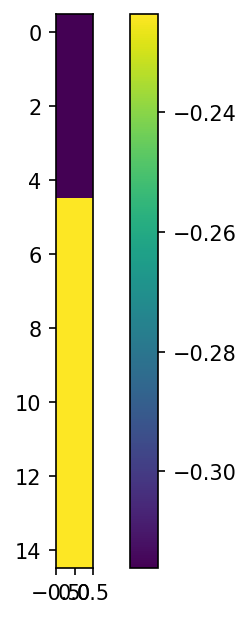

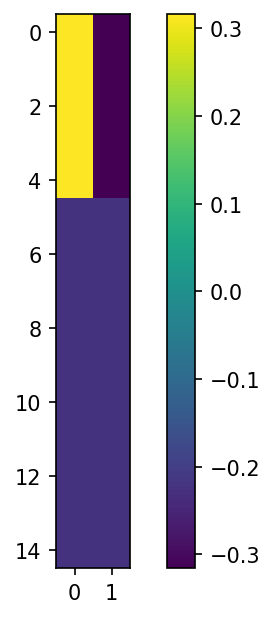

4.3596652584342666


In [63]:
full = np.block([
    [np.zeros((prob.no_len, prob.no_len)), adv.matrix.T],
    [adv.matrix, np.zeros((prob.yes_len, prob.yes_len))]
])
plt.imshow(full)
plt.show()
vals, vects = np.linalg.eig(full)
print(vals)
best_vect = vects[:, np.argmax(vals)].real
print(np.max(vals))
print(best_vect)
print(np.min(best_vect), np.max(best_vect), np.max(best_vect)/np.min(best_vect))
plt.imshow(np.array([best_vect]).T)
plt.colorbar() 
plt.show()
plt.imshow(vects[:, :2].real)
plt.colorbar()
plt.show()
print(np.linalg.norm(full, 2))

In [33]:
app =  full @ best_vect.T
print(best_vect)
print(np.max(best_vect)/np.min(best_vect), np.max(app)/np.min(app))


[0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.2236068
 0.2236068  0.2236068  0.2236068  0.2236068  0.2236068  0.2236068
 0.2236068  0.2236068  0.2236068 ]
1.4142135667105027 1.4142135667105038
